# Parcial Practico 

## *Ejercicio 1* Analisis Exploratorio de Datos

In [315]:
import yfinance as yf
from yahoo_fin.stock_info import get_data
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
sns.set_style("whitegrid")

In [316]:
BTC = yf.Ticker("BTC-USD")
BTC.info

{'name': 'Bitcoin',
 'startDate': 1278979200,
 'description': 'Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,704,531. The last known price of Bitcoin is 68,407.72222247 USD and is down -0.26 over the last 24 hours. It is currently trading on 11071 active market(s) with $30,626,739,943.52 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 69382.23,
 'open': 69382.23,
 'dayLow': 67326.56,
 'dayHigh': 69444.914,
 'regularMarketPreviousClose': 69382.23,
 'regularMarketOpen': 69382.23,
 'regularMarketDayLow': 67326.56,
 'regularMarketDayHigh': 69444.914,
 'volume': 33294006272,
 'regularMarketVolume': 33294006272,
 'averageVolume': 36920763630,
 'averageVolume10days': 28761208069,
 'averageDailyVolume10Day': 28761208069,
 'marketCap': 1345903525888,
 'fiftyTwoWeekLow': 24797.168,
 'fiftyTwoWeekHigh': 

In [317]:
stock = 'BTC'
resolution = '1d'
end_date = datetime.now()
start_date = end_date - timedelta(days=756)
def date_format(date_h):
    return date_h.strftime('%d/%m/%Y')
bit = get_data(stock, start_date=start_date, end_date=end_date, interval=resolution, index_as_date=False)
bit.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2022-05-03,93.099998,93.099998,92.945198,92.945198,89.329941,755,BTC
1,2022-05-04,92.879997,93.276703,92.879997,93.276703,89.648552,803,BTC
2,2022-05-05,92.981003,92.981003,92.790001,92.960503,89.344650,436,BTC
3,2022-05-06,92.790001,92.790001,92.790001,92.790001,89.180779,63,BTC
4,2022-05-09,92.910004,93.080803,92.910004,93.080803,89.460258,1373,BTC


In [415]:
bit['date'] = pd.to_datetime(bit['date'], '%Y-%m-%d')
bit.index = bit['date']
bit.head()

,date,open,high,low,close,adjclose,volume,ticker,scaled_close
date,,,,,,,,,
2022-05-03,2022-05-03,93.099998,93.099998,92.945198,92.945198,89.329941,755,BTC,0.744447
2022-05-04,2022-05-04,92.879997,93.276703,92.879997,93.276703,89.648552,803,BTC,0.799110
2022-05-05,2022-05-05,92.981003,92.981003,92.790001,92.960503,89.344650,436,BTC,0.746970
2022-05-06,2022-05-06,92.790001,92.790001,92.790001,92.790001,89.180779,63,BTC,0.718856
2022-05-09,2022-05-09,92.910004,93.080803,92.910004,93.080803,89.460258,1373,BTC,0.766807


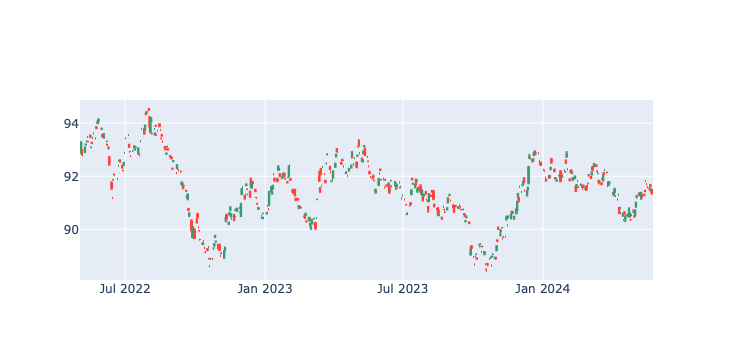

In [464]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = bit.date,
                                     open = bit.open, 
                                     high = bit.high,
                                     low = bit.low, 
                                     close = bit.close)
                     ])
fig.update_layout(xaxis_rangeslider_visible=False)
fig

Podemos observar en el grafico de vela que nuestros valores oscilan sin patron

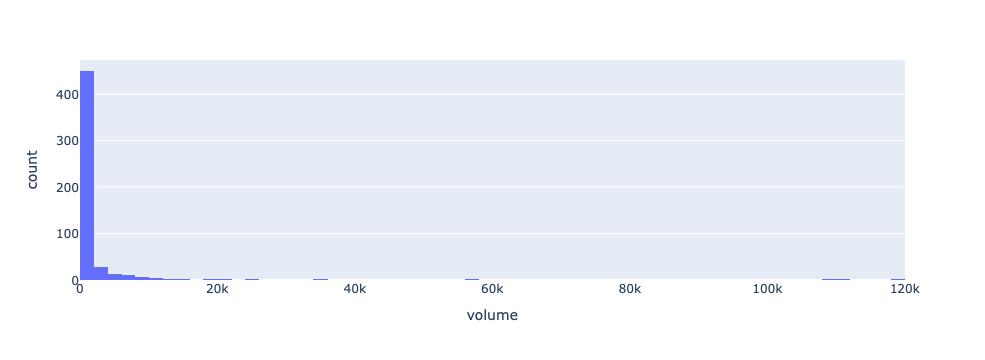

In [319]:
fig = px.histogram(bit, x="volume")
fig.show()

Podemos ver la mayoria de los valores entre 0 y 20k sesgado a la izquierda y varios valores atipicos en 40k, 60k, 100k y 120k.

In [75]:
import warnings
warnings.filterwarnings("ignore")
weekly = bit['close'].resample("7d").mean()
monthly= bit['close'].resample("M").mean()
year = bit['close'].resample("Y").mean()

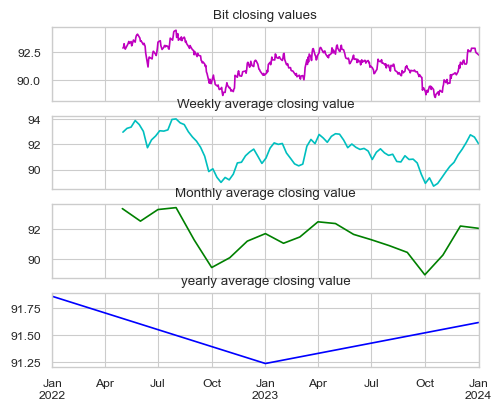

In [96]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5,5)

bit['close'].plot(ax=axarr[0], color='m')
axarr[0].set_title('Bit closing values');

weekly.plot(ax=axarr[1], color='c')
axarr[1].set_title('Weekly average closing value');

monthly.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly average closing value');

year.plot(ax=axarr[3], color='b')
axarr[3].set_title('yearly average closing value');

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa import stattools
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

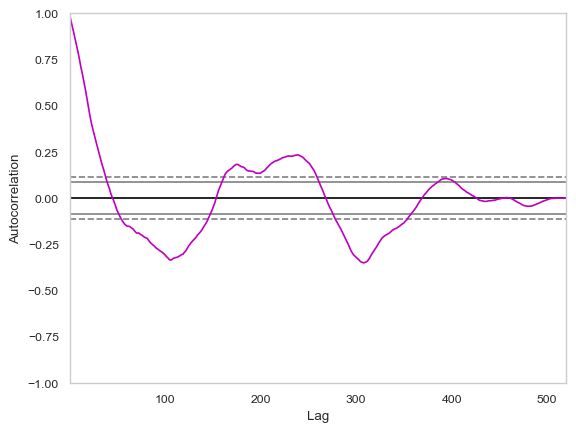

In [94]:
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(bit['close'], color='m')

In [59]:
acf_bit, confint_bit, qstat_bit, pvalues_bit = stattools.acf(bit['close'],
                                                                 nlags=31,
                                                                 qstat=True,
                                                                 alpha=0.05)
alpha = 0.05
for l, p_val in enumerate(pvalues_bit):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 2.3531938893511873e-110
Null hypothesis is rejected at lag = 1 for p-val = 6.911958616433618e-212
Null hypothesis is rejected at lag = 2 for p-val = 8.271556783293014e-309
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0


nuestra serie es estacionaria por lpque podemos ver anteriormente por que no podemos concluir que nuestra serie de tiempo sea estacionaria. Por lo anterior hacemos una transformacion logisitica y comprobamos la estacionaridad de serie

In [68]:
bit['close_logs'] = np.log(bit['close'])
acf_bit_log, confint_bit, qstat_bit, pvalues_bit_log = stattools.acf(bit['close_logs'],
                                                                 nlags=31,
                                                                 qstat=True,
                                                                 alpha=0.05)
alpha = 0.05
alpha = 0.05
for l, p_val in enumerate(pvalues_bit_log):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 2.3027300934657043e-110
Null hypothesis is rejected at lag = 1 for p-val = 6.363960571295069e-212
Null hypothesis is rejected at lag = 2 for p-val = 7.01854487811954e-309
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
N

Nuestra series no se  estacionaria

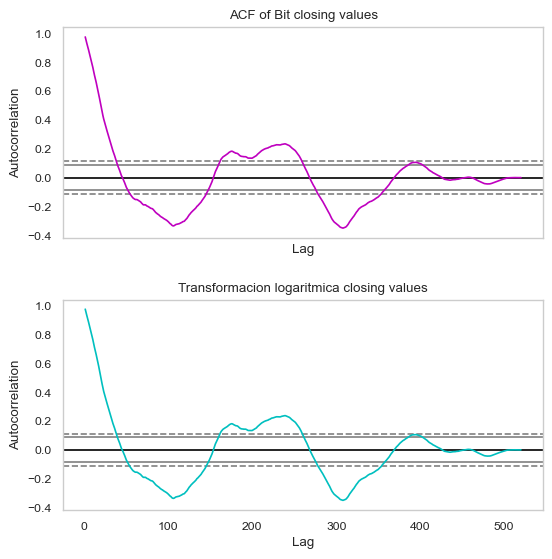

In [67]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(bit['close'], color='m', ax=ax[0])
ax[0].set_title('ACF of Bit closing values')
autocorrelation_plot(bit['close_logs'], color='c', ax=ax[1])
ax[1].set_title('Transformacion logaritmica closing values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

In [89]:
w_stats = bit['close'].resample("7d").aggregate([np.mean, np.median, np.std])
w_stats.head()

,mean,median,std
2022-05-02,92.972202,92.945198,0.182875
2022-05-09,93.273441,93.305000,0.148883
2022-05-16,93.372719,93.444298,0.205004
2022-05-23,93.894058,94.007896,0.292933
2022-05-30,93.571726,93.520000,0.151777


In [90]:
m_stats = bit['close'].resample("mw_stats = bit['close'].resample("7d").aggregate([np.mean, np.median, np.std])
w_stats.head()").aggregate([np.mean, np.median, np.std])
m_stats.head()

,mean,median,std
2022-05-31,93.397838,93.309998,0.394150
2022-06-30,92.557096,92.500000,0.669942
2022-07-31,93.334686,93.113602,0.488481
2022-08-31,93.463535,93.556099,0.499758
2022-09-30,91.299347,91.544998,0.978510


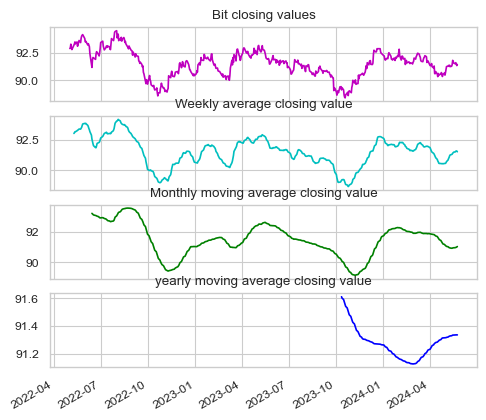

In [97]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5,5)

bit['close'].plot(ax=axarr[0], color='m')
axarr[0].set_title('Bit closing values');

weekly_moving_average = bit['close'].rolling(7).mean()
weekly_moving_average.plot(ax=axarr[1], color='c')
axarr[1].set_title('Weekly average closing value');

monthly_moving_average = bit['close'].rolling(31).mean()
monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average closing value');

year_moving_average = bit['close'].rolling(365).mean()
year_moving_average.plot(ax=axarr[3], color='b')
axarr[3].set_title('yearly moving average closing value');

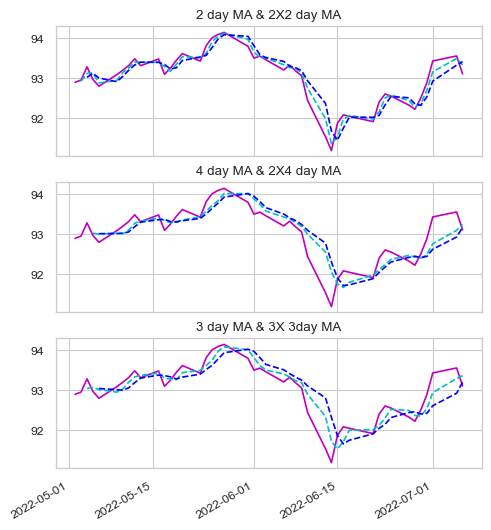

In [99]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 6.5)

MA2 = bit['close'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()
bit['close'].iloc[:45].plot(color='m', linestyle = '-', ax=axarr[0])
MA2.iloc[:45].plot(color='c', linestyle = '--', ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='b', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA');

MA4 = bit['close'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()
bit['close'].iloc[:45].plot(color='m', linestyle = '-', ax=axarr[1])
MA4.iloc[:45].plot(color='c', linestyle = '--', ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='b', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA');

MA3 = bit['close'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()
bit['close'].iloc[:45].plot(color='m', linestyle = '-', ax=axarr[2])
MA3.iloc[:45].plot(color='c', linestyle = '--', ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='b', linestyle = '--', ax=axarr[2])
axarr[2].set_title('3 day MA & 3X 3day MA');

Revisamos medias moviles primero de 2 dias y 2X2 dias

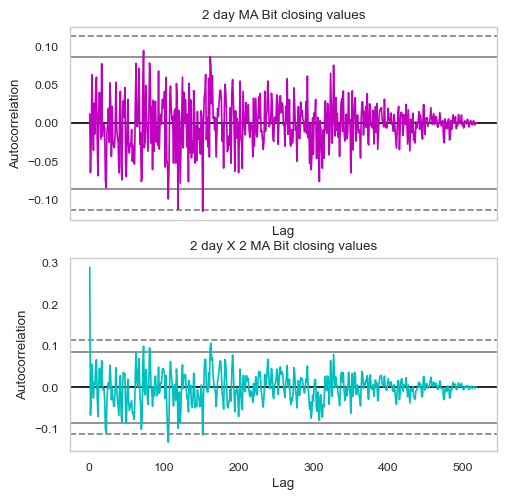

In [109]:
residualsMA2 = bit['close']-MA2
residualsMA2 = residualsMA2.loc[~pd.isnull(residualsMA2)]
residualsTwoMA2 = bit['close']-TwoXMA2
residualsTwoMA2 = residualsTwoMA2.loc[~pd.isnull(residualsTwoMA2)]
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(residualsMA2, color='m', ax=ax[0])
ax[0].set_title('2 day MA Bit closing values')
autocorrelation_plot(residualsTwoMA2, color='c', ax=ax[1])
ax[1].set_title('2 day X 2 MA Bit closing values')
plt.show()

se observa que pueden ser estacionarios nuestro residuos comprobamos con pruebas de hipotesis dicker y fuller

In [113]:
_, _, _, pval_MA2 = stattools.acf(residualsMA2,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_MA2<=0.05))


Null hypothesis is rejected for lags: (array([], dtype=int64),)


In [114]:
_, _, _, pval_TwoMA2X = stattools.acf(residualsTwoMA2,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_TwoMA2X<=0.05))

Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)


Se rechaza la estacionaridad para los residuos. Hacemos la comprobacion par medias moviles 3 dias y 3 dias por 3 dias

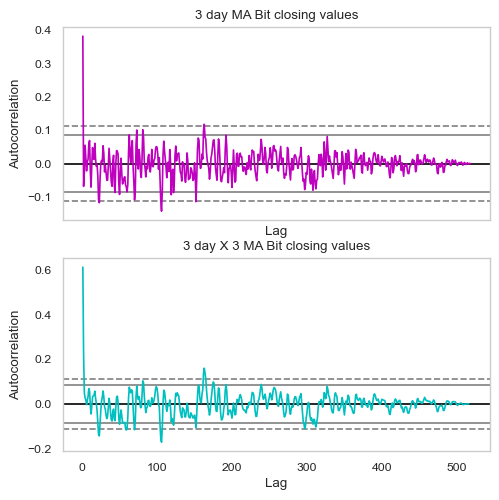

In [117]:
residualsMA3 = bit['close']-MA3
residualsMA3 = residualsMA3.loc[~pd.isnull(residualsMA3)]
residualsThreeMA3 = bit['close']-ThreeXMA3
residualsThreeMA3 = residualsThreeMA3.loc[~pd.isnull(residualsThreeMA3)]
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(residualsMA3, color='m', ax=ax[0])
ax[0].set_title('3 day MA Bit closing values')
autocorrelation_plot(residualsThreeMA3, color='c', ax=ax[1])
ax[1].set_title('3 day X 3 MA Bit closing values')
plt.show()

In [119]:
_, _, _, pval_MA3 = stattools.acf(residualsMA3,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_MA3<=0.05))

Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)


In [121]:
_, _, _, pval_ThreeMA3X = stattools.acf(residualsThreeMA3,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_ThreeMA3X<=0.05))

Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)


se rechaza la hipotesis de estacionaridad. Ahora comprobamos medias moviles de 4 y medias moviles de 2x4

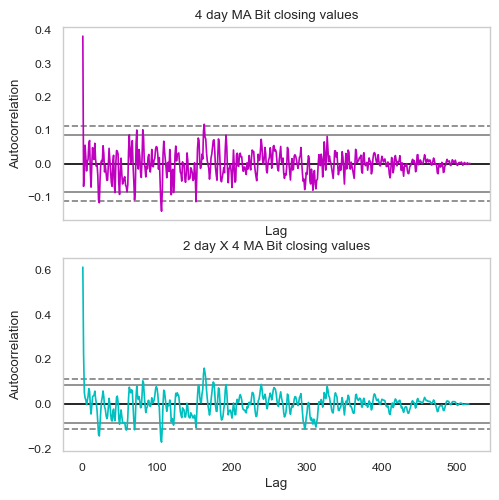

In [124]:
residualsMA4 = bit['close']-MA4
residualsMA4 = residualsMA4.loc[~pd.isnull(residualsMA4)]
residualsTwoMA4 = bit['close']-TwoXMA4
residualsTwoMA4 = residualsTwoMA4.loc[~pd.isnull(residualsTwoMA4)]
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(residualsMA3, color='m', ax=ax[0])
ax[0].set_title('4 day MA Bit closing values')
autocorrelation_plot(residualsThreeMA3, color='c', ax=ax[1])
ax[1].set_title('2 day X 4 MA Bit closing values')
plt.show()

se observa la misma tendecia de las medias moviles anteriores por lo que se procede a hacer la prueba

In [128]:
_, _, _, pval_MA4 = stattools.acf(residualsMA4,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_MA3<=0.05))

Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)


In [129]:
_, _, _, pval_TwoMA4X = stattools.acf(residualsTwoMA,
                                           nlags=62, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_TwoMA4X<=0.05))

Null hypothesis is rejected for lags: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)


Se rechaza la hipotesis de estacionaridad.

In [137]:
adf_result = stattools.adfuller(bit['close'], autolag='AIC')
print('p-val of the ADF test on irregular variations in bit coin data:', adf_result[1])

p-val of the ADF test on irregular variations in bit coin data: 0.09918423646424185


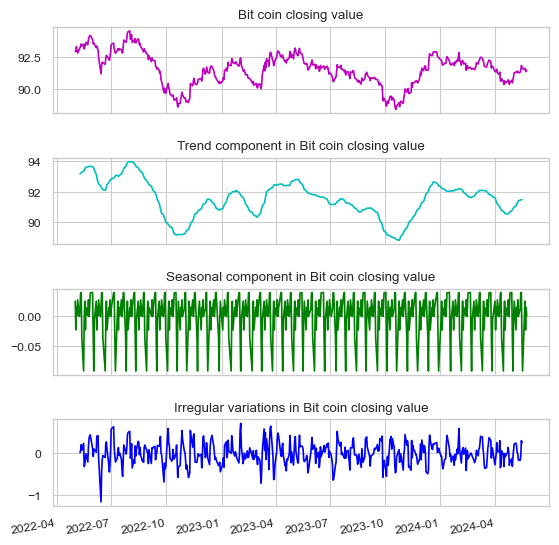

In [134]:
from statsmodels.tsa import seasonal
decompose_model = seasonal.seasonal_decompose(bit.close.tolist(), period=12, model='additive')
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

bit['close'].plot(ax=axarr[0], color='m', linestyle='-')
axarr[0].set_title('Bit coin closing value')

pd.Series(data=decompose_model.trend, index=bit.index).plot(color='c', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in Bit coin closing value')

pd.Series(data=decompose_model.seasonal, index=bit.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in Bit coin closing value')

pd.Series(data=decompose_model.resid, index=bit.index).plot(color='b', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in Bit coin closing value')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0);
plt.xticks(rotation=10);

In [136]:
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], 
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in bit coin data:', adf_result[1])

p-val of the ADF test on irregular variations in bit coin data: 2.5136958582994198e-17


nuestro residuos no siguen tendencias

## *Ejercicio 2* Modelos estadisticos

#### Simple exponetial smoothing

Lo hacemos con la libreria 

In [380]:
tau_test = 48
train = bit_ts[:-tau_test]
test  = bit_ts[-tau_test:]
print((len(train), len(test)))

(472, 48)


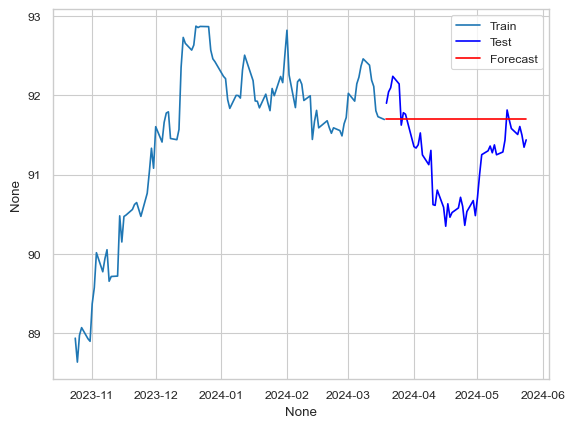

In [483]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
import statsmodels.tsa.api as smt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
import itertools
import warnings

def plot_model(train, test, y_pred, title):
    
    ax = sns.lineplot(x=train.index[-100:], y=train[-100:], label="Train")
    sns.lineplot(x=test.index, y=test, label="Test", color='b')
    sns.lineplot(x=test.index, y=y_pred, label="Forecast", color='r')
    plt.show()
    
def ses_optimizer(train, alphas, step):

    best_alpha, best_mae = None, float("inf")

    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)

        if mae < best_mae:
            best_alpha, best_mae = alpha, mae

    return best_alpha, best_mae

def ses_model_tuning(train , test, step, title="Model Tuning - Single Exponential Smoothing"):
    
    alphas = np.arange(0.8, 1, 0.01)
    best_alpha, best_mae = ses_optimizer(train, alphas, step=step)
    final_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha, optimized=False)
    y_pred = final_model.forecast(step)
    mae = mean_absolute_error(test, y_pred)
    
    return plot_model(train, test, y_pred, title), y_pred,final_model

plot, y_pred,ses_model=ses_model_tuning(train, test, step=tau_test)               


In [512]:
def forecast_accuracy(forecast, actual,model, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    r2 = r2_score(forecast, actual)

    
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse],
                           'R2': [r2],
                          "AIC":[model.aic]},
                          index=[str_name])
    
    return df_acc
ses=forecast_accuracy(y_pred.values,test,ses_model,"SES")
ses.head()

,MAE,MSE,MAPE,RMSE,R2,AIC
SES,0.577009,0.501518,0.006349,0.708179,0.0,-1230.865067


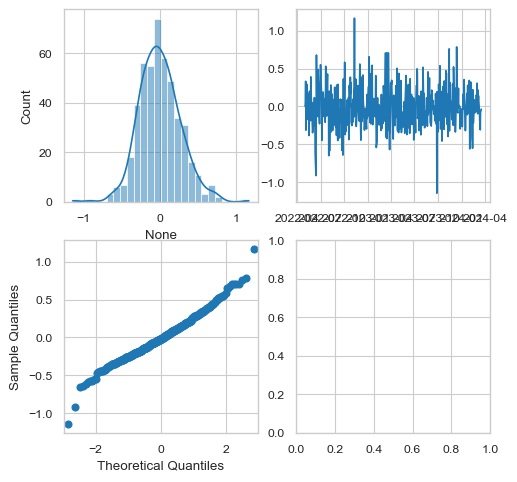

In [546]:
import statsmodels.api as sm
fig, axarr = plt.subplots(2,2)
fig.set_size_inches(5.5, 5.5)
sns.histplot( x=ses_model.resid, kde=True,ax=axarr[0,0])
sns.lineplot(data=ses_model.resid,ax=axarr[0,1])
sm.qqplot(ses_model.resid,ax=axarr[1,0])
plt.show()

Nuestros resuidos se observa que estan distribuidos normalmente

#### Double exponetial smoothing

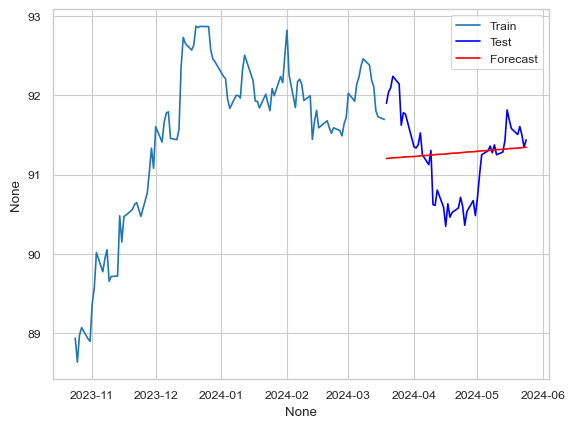

In [477]:
def des_optimizer(train, alphas, betas, trend, step):

    best_alpha, best_beta, best_mae = None, None, float("inf")

    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend=trend).fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae

    return best_alpha, best_beta, best_mae

def des_model_tuning(train , test, step, trend, title="Model Tuning - Double Exponential Smoothing"):
    
    alphas = np.arange(0.01, 1, 0.10)
    betas = np.arange(0.01, 1, 0.10)
    best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, trend=trend, step=step)
    final_model = ExponentialSmoothing(train, trend=trend).fit(smoothing_level=best_alpha, smoothing_slope=best_beta)
    y_pred = final_model.forecast(step)
    mae = mean_absolute_error(test, y_pred)
    
    return plot_model(train, test, y_pred, title),y_pred,final_model

plot,y_pred,des_model=des_model_tuning(train, test, step=tau_test, trend='add')

In [513]:
Des=forecast_accuracy(y_pred.values,test,des_model,"DES")
Des.head()

,MAE,MSE,MAPE,RMSE,R2,AIC
DES,0.577009,0.501518,0.006349,0.708179,0.0,212.733868


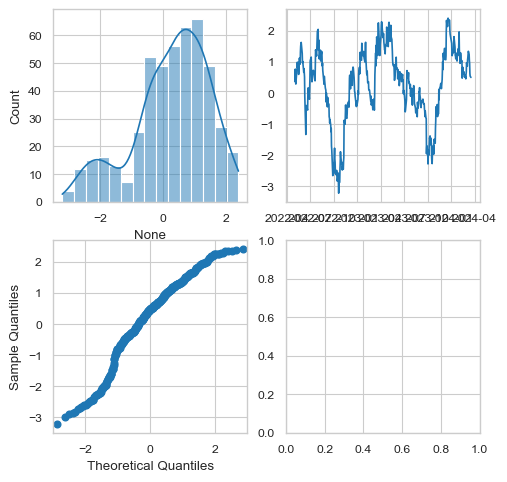

In [547]:
import statsmodels.api as sm
fig, axarr = plt.subplots(2,2)
fig.set_size_inches(5.5, 5.5)
sns.histplot( x=des_model.resid, kde=True,ax=axarr[0,0])
sns.lineplot(data=des_model.resid,ax=axarr[0,1])
sm.qqplot(des_model.resid,ax=axarr[1,0])
plt.show()

Nuestros resuidos se observa que estan distribuidos normalmente

#### ARIMA 

In [185]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.tsa.arima.model as arima_model

In [493]:
n_bit = len(bit.close); n_test = 28 # This can be changed
train_size = n_bit - n_test

train = bit.close[:train_size]
dates_train = bit.index[:train_size]
test_4w = bit.close[train_size:train_size + n_test] 
dates_4w = bit.index[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_4w:", test_4w.shape)

train: (491,)
test_4w: (28,)


In [494]:
n_bit = len(bit.close); n_test = 28 # This can be changed
train_size = n_bit - n_test

train = bit.close[:train_size]
dates_train = bit.index[:train_size]
test_4w = bit.close[train_size:train_size + n_test] 
dates_4w = bit.index[train_size:train_size + n_test] 
print("train:", train.shape)
print("test_4w:", test_4w.shape)
print(dates_4w)

train: (491,)
test_4w: (28,)
DatetimeIndex(['2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30', '2024-05-01', '2024-05-02',
               '2024-05-03', '2024-05-06', '2024-05-07', '2024-05-08',
               '2024-05-09', '2024-05-10', '2024-05-13', '2024-05-14',
               '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-20',
               '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24'],
              dtype='datetime64[ns]', name='date', freq=None)


In [496]:
import pmdarima as pm

model_arima = pm.arima.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=116.148, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=112.150, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=114.072, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=114.061, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=110.339, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.206 seconds


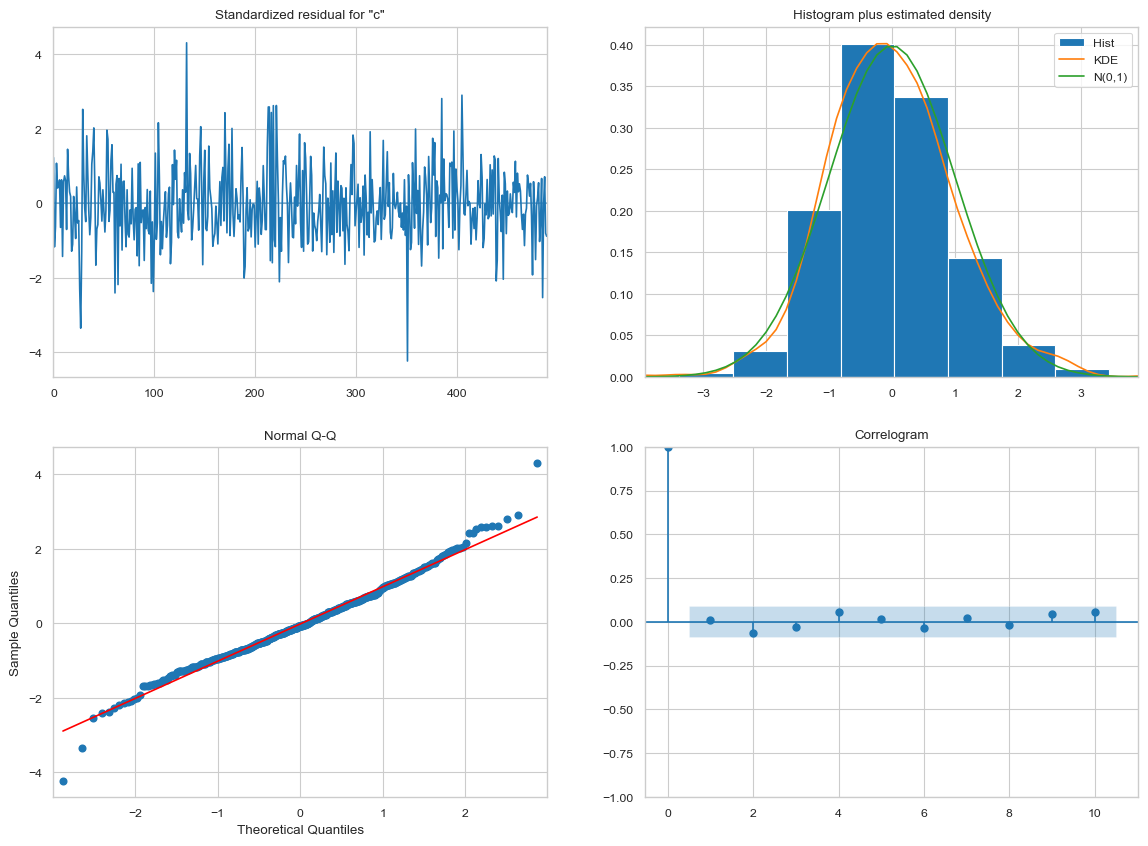

In [498]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
best_aic = np.inf
best_bic = np.inf

best_order = None
best_mdl = None

pq_rng = range(5)
d_rng  = range(3)

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                # print(i, d, j)
                tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue
model_arima = ARIMA(train, order=best_order)
model_arima_fit = model_arima.fit()

model_arima_fit.plot_diagnostics(figsize=(14,10));


Nuestro residuos son normales e independientes y no siguen una tendecia estipulada.

In [500]:
tau_h = 28

forecast = model_arima_fit.get_forecast(tau_h)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

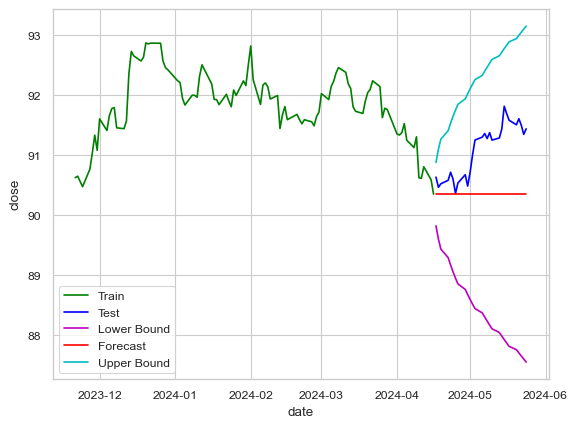

In [501]:
ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates_4w, y=test_4w, label="Test", color='b')
sns.lineplot(x=dates_4w, y=yhat_conf_int["lower close"], label="Lower Bound", color='m')
sns.lineplot(x=dates_4w, y=yhat, label="Forecast", color='r')
sns.lineplot(x=dates_4w, y=yhat_conf_int["upper close"], label="Upper Bound", color='c')
plt.show()

In [514]:
arima=forecast_accuracy(np.array(test_4w), np.array(yhat),model_arima_fit, "arima")
arima.head()

,MAE,MSE,MAPE,RMSE,R2,AIC
arima,0.73267,0.732112,0.008109,0.855635,-2.748532,110.338638


In [504]:
def arima_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions,model_fit
    
test_4wl = test_4w.tolist()
yhat_4w,model_fit_rolling  = arima_rolling(train.tolist(), test_4wl)

predicted=90.348801, expected=90.631699
predicted=90.631699, expected=90.462502
predicted=90.462502, expected=90.521599
predicted=90.521599, expected=90.579498
predicted=90.579498, expected=90.713699
predicted=90.713699, expected=90.599197
predicted=90.599197, expected=90.360001
predicted=90.360001, expected=90.533798
predicted=90.533798, expected=90.672302
predicted=90.672302, expected=90.482399
predicted=90.482399, expected=90.710602
predicted=90.710602, expected=91.000504
predicted=91.000504, expected=91.251099
predicted=91.251099, expected=91.300003
predicted=91.300003, expected=91.360001
predicted=91.360001, expected=91.275398
predicted=91.275398, expected=91.374603
predicted=91.374603, expected=91.250000
predicted=91.250000, expected=91.285202
predicted=91.285202, expected=91.434998
predicted=91.434998, expected=91.814796
predicted=91.814796, expected=91.691597
predicted=91.691597, expected=91.581398
predicted=91.581398, expected=91.505997
predicted=91.505997, expected=91.606598


In [515]:
arima_rolling=forecast_accuracy(np.array(test_4wl), np.array(yhat_4w),model_fit_rolling, "arima rolling")
arima_rolling.head()

,MAE,MSE,MAPE,RMSE,R2,AIC
arima rolling,0.145461,0.027908,0.001599,0.167058,0.857105,99.62435


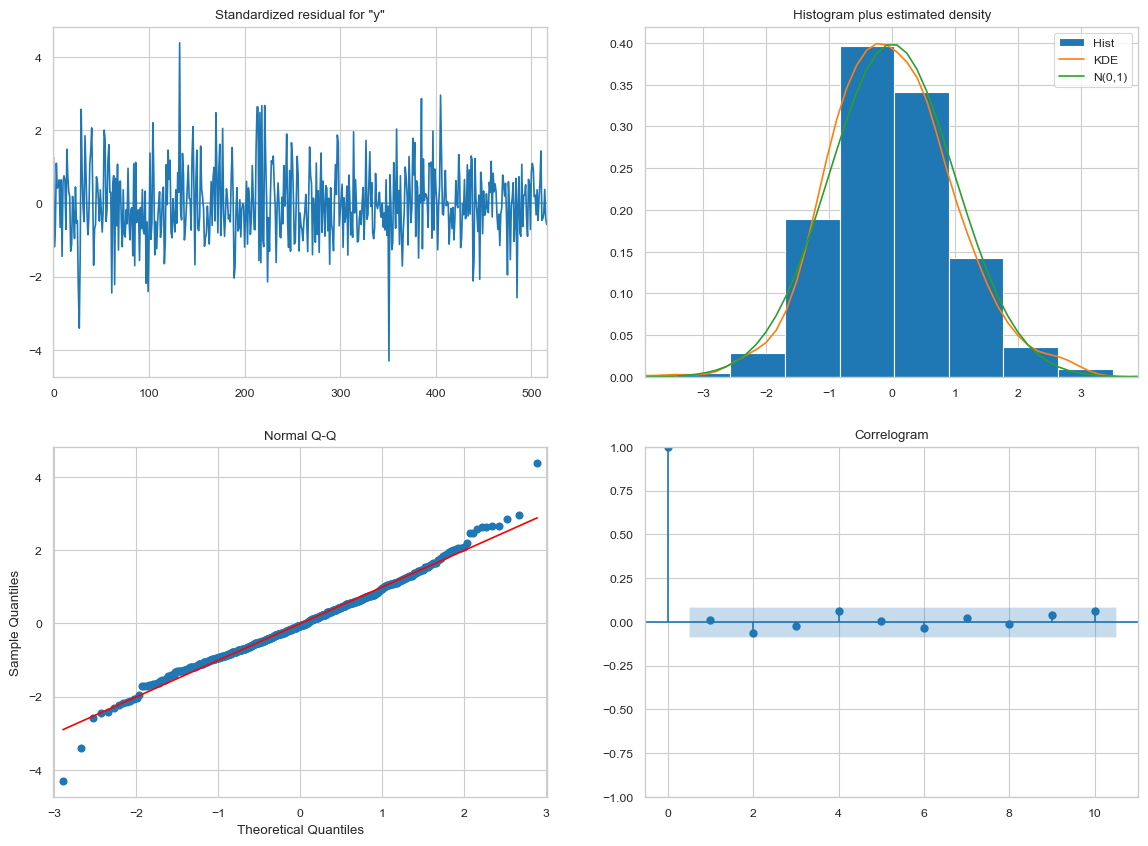

In [548]:
model_fit_rolling.plot_diagnostics(figsize=(14,10));

Nuestros residuos son normales y no tienen tendencia

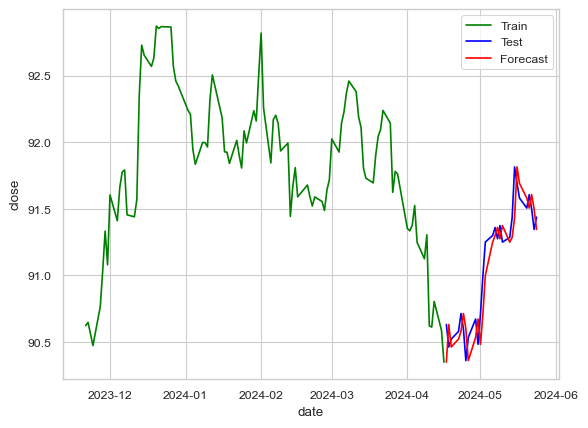

In [506]:

ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates_4w, y=test_4wl, label="Test", color='b')
sns.lineplot(x=dates_4w, y=yhat_4w, label="Forecast", color='r')
plt.show()

#### GARCH

In [517]:
from arch import arch_model

garch = arch_model(train, vol='garch', p=1, o=0, q=1)
garch_fitted = garch.fit()

def garch_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = arch_model(history, vol='garch', p=1, o=0, q=1)
        model_fit = model.fit()
        garch_forecast = model_fit.forecast(horizon=1)
        yhat = garch_forecast.mean['h.1'].iloc[-1]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions, model_fit

test_4wl = test_4w.tolist()
yhat_4wd,garch_rolling  = garch_rolling(train.tolist(), test_4w)
print(yhat_4wd)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 48382104991.82135
Iteration:      2,   Func. Count:     14,   Neg. LLF: 274348416.4965284
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2887.755351736523
Iteration:      4,   Func. Count:     26,   Neg. LLF: 662.0206182775062
Iteration:      5,   Func. Count:     34,   Neg. LLF: 14032.939965573616
Iteration:      6,   Func. Count:     40,   Neg. LLF: 606.4700777183157
Iteration:      7,   Func. Count:     45,   Neg. LLF: 595.1581535177614
Iteration:      8,   Func. Count:     50,   Neg. LLF: 590.3310478672961
Iteration:      9,   Func. Count:     55,   Neg. LLF: 589.3575913390063
Iteration:     10,   Func. Count:     60,   Neg. LLF: 588.7801830758704
Iteration:     11,   Func. Count:     65,   Neg. LLF: 588.6636203659475
Iteration:     12,   Func. Count:     70,   Neg. LLF: 588.65302610831
Iteration:     13,   Func. Count:     75,   Neg. LLF: 588.6495718832584
Iteration:     14,   Func. Count:     80,   Neg. LLF: 588.6488783

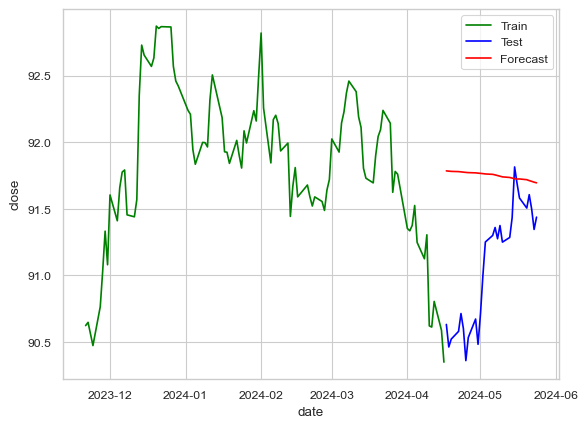

In [508]:

ax = sns.lineplot(x=dates_train[-100:], y=train[-100:], label="Train", color='g')
sns.lineplot(x=dates_4w, y=test_4wl, label="Test", color='b')
sns.lineplot(x=dates_4w, y=yhat_4wd, label="Forecast", color='r')
plt.show()

In [518]:
garch_r=forecast_accuracy(np.array(test_4wl), np.array(yhat_4wd),garch_rolling, "garch rolling")
garch_r.head()

,MAE,MSE,MAPE,RMSE,R2,AIC
garch rolling,0.674381,0.662643,0.007349,0.814029,-2.392841,1231.888751


Comparamos los modelos anteriores:

In [555]:
modelos=pd.concat([ses,Des,arima, arima_rolling, garch_r], axis=0)
modelos.head()

,MAE,MSE,MAPE,RMSE,R2,AIC
SES,0.577009,0.501518,0.006349,0.708179,0.000000,-1230.865067
DES,0.577009,0.501518,0.006349,0.708179,0.000000,212.733868
arima,0.732670,0.732112,0.008109,0.855635,-2.748532,110.338638
arima rolling,0.145461,0.027908,0.001599,0.167058,0.857105,99.624350
garch rolling,0.674381,0.662643,0.007349,0.814029,-2.392841,1231.888751


El menor AIC lo tiene el ARIMA con Rolling y tambien tiene el que mas explica nuestro fenomeno.

## *Ejercicio 3* Modelos de deep learning

In [398]:
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [429]:
scaler = MinMaxScaler(feature_range=(0, 1))
bit['scaled_close'] = scaler.fit_transform(np.array(bit['close']).reshape(-1, 1))
split_date = datetime.datetime(year=2023, month=12, day=1)
df_train = bit.loc[bit['date']<split_date]
df_train.reset_index(drop=True, inplace=True)
df_val = bit.loc[bit['date']>=split_date]
df_val.reset_index(drop=True, inplace=True)
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (398, 9)
Shape of test: (121, 9)


In [430]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        if i-nb_timesteps <= 4:
            print(i-nb_timesteps, i-1, i)
        X.append(list(ts.loc[i-nb_timesteps:i-1])) #Regressors
        y.append(ts.loc[i]) #Target
    X, y = np.array(X), np.array(y)
    return X, y

X_train, y_train = makeXy(df_train['scaled_close'], 7)

0 6 7
1 7 8
2 8 9
3 9 10
4 10 11


In [436]:
X_val, y_val = makeXy(df_val['scaled_close'], 7)

0 6 7
1 7 8
2 8 9
3 9 10
4 10 11


In [432]:
input_layer = Input(shape=(7,), dtype='float32')
dense1 = Dense(32, activation='linear')(input_layer)
dense2 = Dense(16, activation='linear')(dense1)
dense3 = Dense(16, activation='linear')(dense2)
dropout_layer = Dropout(0.2)(dense3)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [433]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_squared_error', optimizer='adam')
ts_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

In [443]:
save_weights_at = os.path.join('keras_models', 'MLP_weights.{epoch:02d}-{val_loss:.4f}.keras')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch');ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=2, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True);

Epoch 1/20
25/25 - 0s - 2ms/step - loss: 0.0079 - val_loss: 0.0016
Epoch 2/20
25/25 - 0s - 1ms/step - loss: 0.0072 - val_loss: 0.0018
Epoch 3/20
25/25 - 0s - 885us/step - loss: 0.0071 - val_loss: 0.0017
Epoch 4/20
25/25 - 0s - 1ms/step - loss: 0.0086 - val_loss: 0.0016
Epoch 5/20
25/25 - 0s - 915us/step - loss: 0.0065 - val_loss: 0.0020
Epoch 6/20
25/25 - 0s - 907us/step - loss: 0.0069 - val_loss: 0.0033
Epoch 7/20
25/25 - 0s - 889us/step - loss: 0.0075 - val_loss: 0.0022
Epoch 8/20
25/25 - 0s - 875us/step - loss: 0.0068 - val_loss: 0.0018
Epoch 9/20
25/25 - 0s - 923us/step - loss: 0.0066 - val_loss: 0.0016
Epoch 10/20
25/25 - 0s - 1ms/step - loss: 0.0079 - val_loss: 0.0016
Epoch 11/20
25/25 - 0s - 911us/step - loss: 0.0071 - val_loss: 0.0017
Epoch 12/20
25/25 - 0s - 893us/step - loss: 0.0069 - val_loss: 0.0017
Epoch 13/20
25/25 - 0s - 912us/step - loss: 0.0066 - val_loss: 0.0022
Epoch 14/20
25/25 - 0s - 887us/step - loss: 0.0063 - val_loss: 0.0017
Epoch 15/20
25/25 - 0s - 911us/step -

In [519]:
mlp=ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=2, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True);

Epoch 1/20
25/25 - 0s - 8ms/step - loss: 0.0490 - val_loss: 0.0450
Epoch 2/20
25/25 - 0s - 2ms/step - loss: 0.0474 - val_loss: 0.0297
Epoch 3/20
25/25 - 0s - 2ms/step - loss: 0.0515 - val_loss: 0.0367
Epoch 4/20
25/25 - 0s - 5ms/step - loss: 0.0471 - val_loss: 0.0280
Epoch 5/20
25/25 - 0s - 2ms/step - loss: 0.0470 - val_loss: 0.0299
Epoch 6/20
25/25 - 0s - 2ms/step - loss: 0.0468 - val_loss: 0.0294
Epoch 7/20
25/25 - 0s - 2ms/step - loss: 0.0458 - val_loss: 0.0317
Epoch 8/20
25/25 - 0s - 2ms/step - loss: 0.0482 - val_loss: 0.0333
Epoch 9/20
25/25 - 0s - 2ms/step - loss: 0.0452 - val_loss: 0.0285
Epoch 10/20
25/25 - 0s - 2ms/step - loss: 0.0478 - val_loss: 0.0344
Epoch 11/20
25/25 - 0s - 2ms/step - loss: 0.0462 - val_loss: 0.0329
Epoch 12/20
25/25 - 0s - 3ms/step - loss: 0.0471 - val_loss: 0.0355
Epoch 13/20
25/25 - 0s - 3ms/step - loss: 0.0452 - val_loss: 0.0274
Epoch 14/20
25/25 - 0s - 2ms/step - loss: 0.0441 - val_loss: 0.0297
Epoch 15/20
25/25 - 0s - 3ms/step - loss: 0.0438 - val_lo

In [445]:
best_model = load_model(os.path.join('keras_models', 'MLP_weights.01-0.0016.keras'), compile=False)
preds = best_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x2dbcfc0e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [446]:
r2 = r2_score(df_val['close'].loc[7:], pred_PRES)
print('R-squared for the validation set:', round(r2,4))

R-squared for the validation set: 0.8451


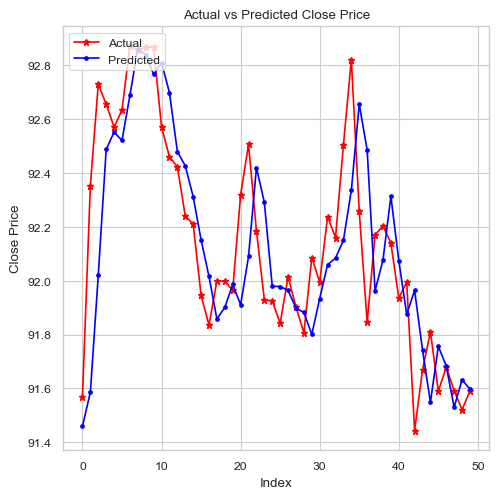

In [450]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['close'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Close Price')
plt.ylabel("Close Price")
plt.xlabel('Index');

### LSTM

In [451]:
from keras.layers import Dense, Input, Dropout
from keras.layers import LSTM
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [452]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of 3D arrays:', X_train.shape, X_val.shape)
input_layer = Input(shape=(7,1), dtype='float32')
lstm_layer1 = LSTM(64, input_shape=(7,1), return_sequences=True)(input_layer)
lstm_layer2 = LSTM(32, input_shape=(7,64), return_sequences=False)(lstm_layer1)
dropout_layer = Dropout(0.2)(lstm_layer2)
output_layer = Dense(1, activation='linear')(dropout_layer)
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam') #SGD(lr=0.001, decay=1e-5))
ts_model.summary()

Shape of 3D arrays: (391, 7, 1) (114, 7, 1)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 7, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 7, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [461]:
save_weights_at = os.path.join('keras_models', 'LSTM_weights.{epoch:02d}-{val_loss:.4f}.keras')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch')

ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=30,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0537 - val_loss: 0.0340
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0581 - val_loss: 0.0322
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0580 - val_loss: 0.0360
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0618 - val_loss: 0.0379
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0573 - val_loss: 0.0320
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0523 - val_loss: 0.0351
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0577 - val_loss: 0.0348
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0530 - val_loss: 0.0376
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0500 - val_loss: 0.0306
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0562 - val_loss: 0.0314
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0534 - val_loss: 0.0308
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0478 - val_lo

In [462]:
best_model = load_model(os.path.join('keras_models', 'LSTM_weights.01-0.0340.keras'))

preds = best_model.predict(X_val)
pred_close= scaler.inverse_transform(preds)
pred_close = np.squeeze(pred_close)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [463]:
from sklearn.metrics import mean_absolute_error
r2 = r2_score(df_val['close'].loc[7:], pred_close)
print('R-squared for the validation set:', round(r2,4))
mae = mean_absolute_error(df_val["close"].loc[7:], pred_close)
print('MAE for the validation set:', round(mae, 4))

R-squared for the validation set: 0.8066
MAE for the validation set: 0.2059
